In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CNRDfqJQa1XNkBJStX5Z")
project = rf.workspace("computer-vision-1msje").project("flames-and-smoke-detection")
version = project.version(1)
dataset = version.download("yolov9")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flames-and-Smoke-Detection-1 in yolov9:: 100%|██████████| 2322/2322 [00:00<00:00, 6015.45it/s]


Total Images Found: 1155


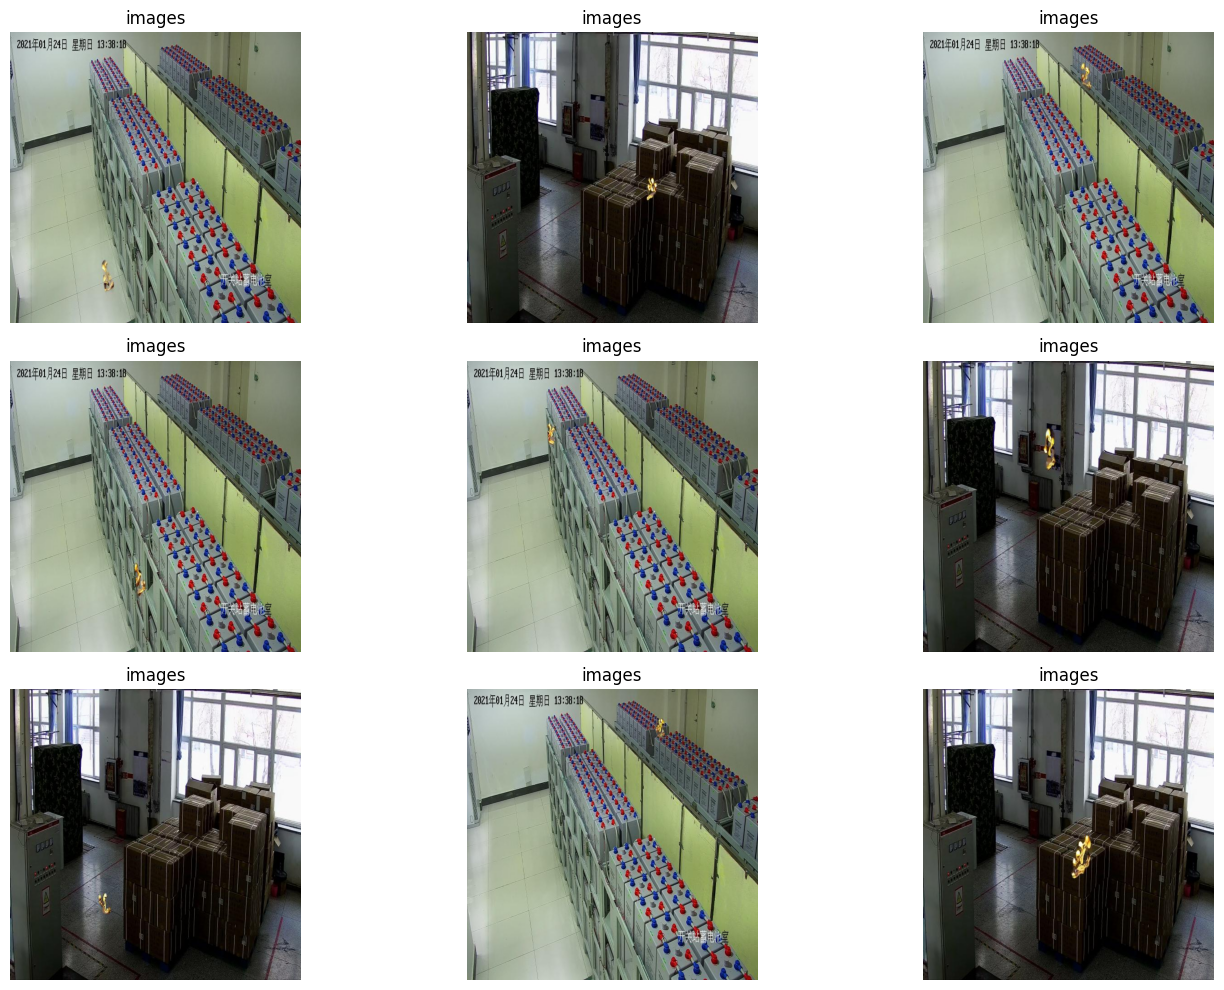

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset path
data_path = '/kaggle/working/Flames-and-Smoke-Detection-1'

# 1. Inspect Dataset
image_files = []
for root, _, files in os.walk(data_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))

print(f"Total Images Found: {len(image_files)}")

# Display Random Images from Dataset
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(image_files[:9]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(os.path.dirname(img_path)))
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [6]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [8]:
dataset.location

'/kaggle/working/Flames-and-Smoke-Detection-1'

In [11]:
!yolo task=detect mode=train model=yolov9s.pt data=/kaggle/working/Flames-and-Smoke-Detection-1/data.yaml epochs=50 imgsz=640 plots=True

100%|██████████████████████████████████████| 14.7M/14.7M [00:00<00:00, 26.6MB/s]
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/kaggle/working/Flames-and-Smoke-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

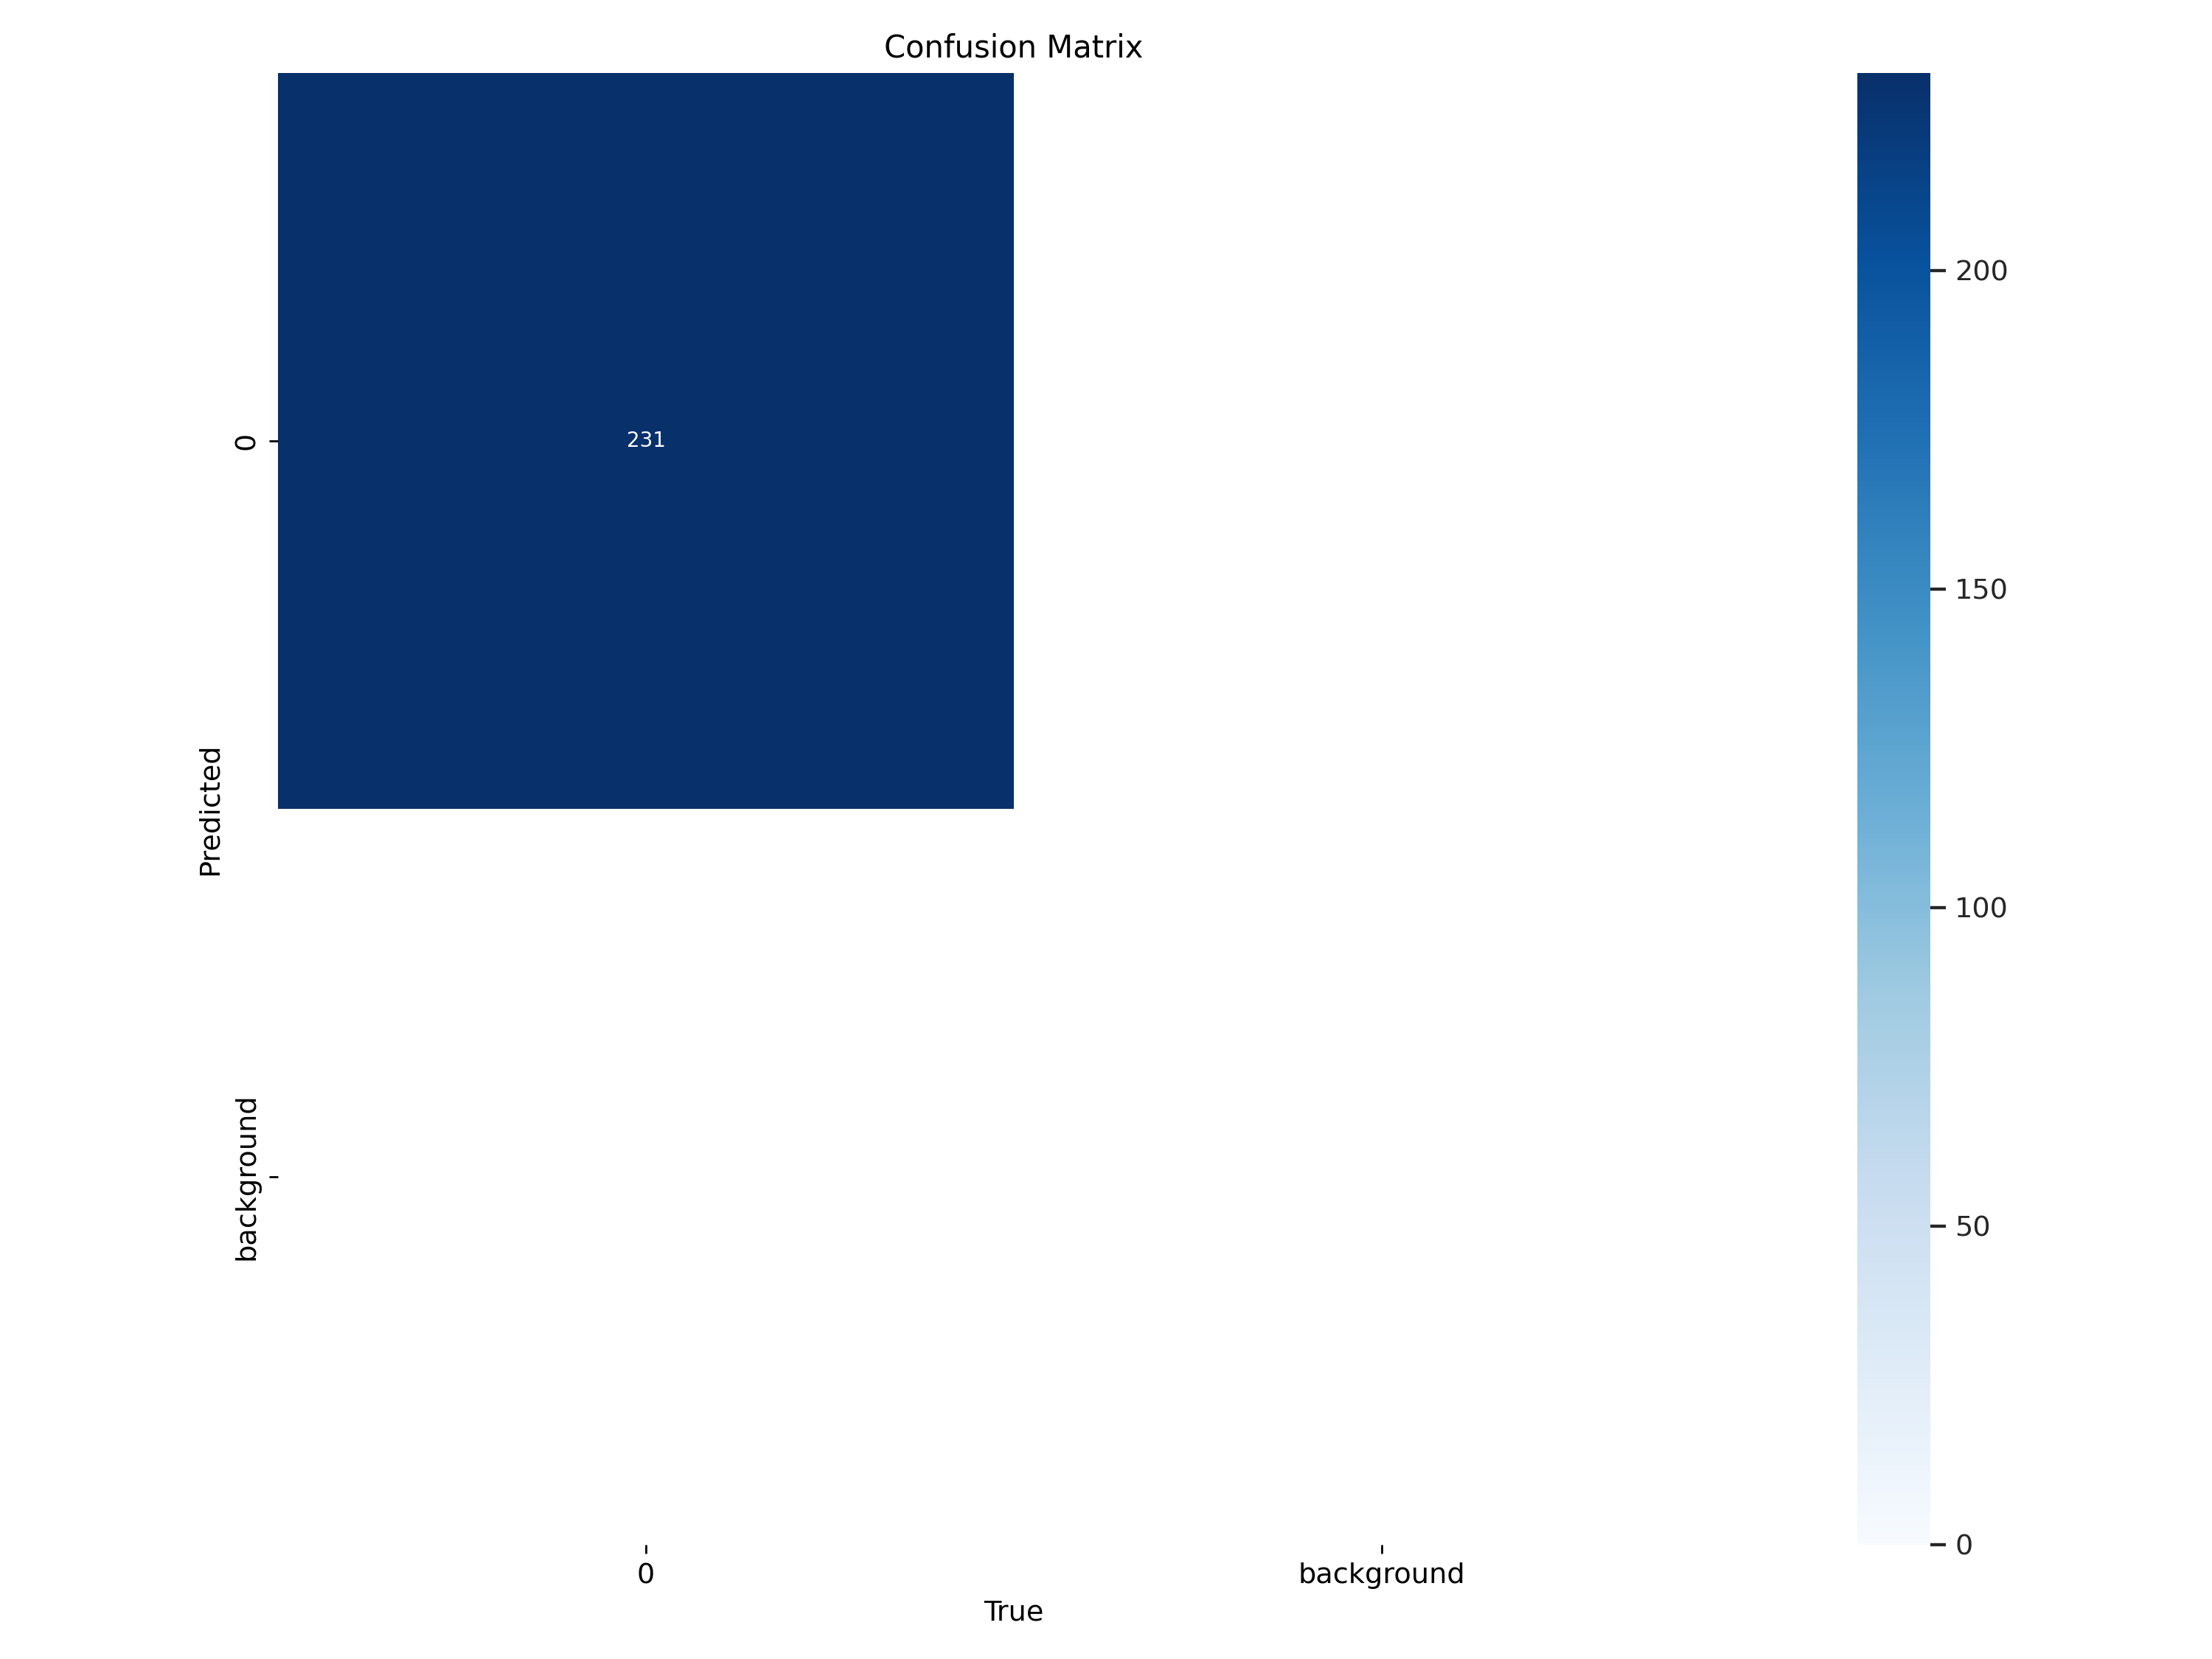

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

In [13]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Flames-and-Smoke-Detection-1/test/images save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs

image 1/115 /kaggle/working/Flames-and-Smoke-Detection-1/test/images/huoyan4_30485876524_png.rf.f24f015f52959e4da1c160fa69984ca1.jpg: 640x640 1 0, 21.2ms
image 2/115 /kaggle/working/Flames-and-Smoke-Detection-1/test/images/huoyan4_30486493530_png.rf.319a9dea3ea74ba2f6d9822677a7bb2d.jpg: 640x640 1 0, 20.1ms
image 3/115 /kaggle/working/Flames-and-Smoke-Detection-1/test/images/huoyan4_30487880974_png.rf.1a61cc60a25b0be01979cd7548dac1ec.jpg: 640x640 1 0, 20.1ms
image 4/115 /kaggle/working/Flames-and-Smoke-Detection-1/test/images/huoyan4_30489113206_png.rf.9603d9d277056d57f2645b140500d8de.jpg: 640x640 1 0, 20.0ms
image 5/115 /kaggle/working/Flames-and-Smoke-Detection-1/test/images/huoyan4_30489884772_png.rf.07090639b2ca22a2ced7b753710547ed.jpg: 640x640 1 0, 20.1ms
image 6/115 /kaggle/working/Flames-and-Smoke-Detection-1/test/i

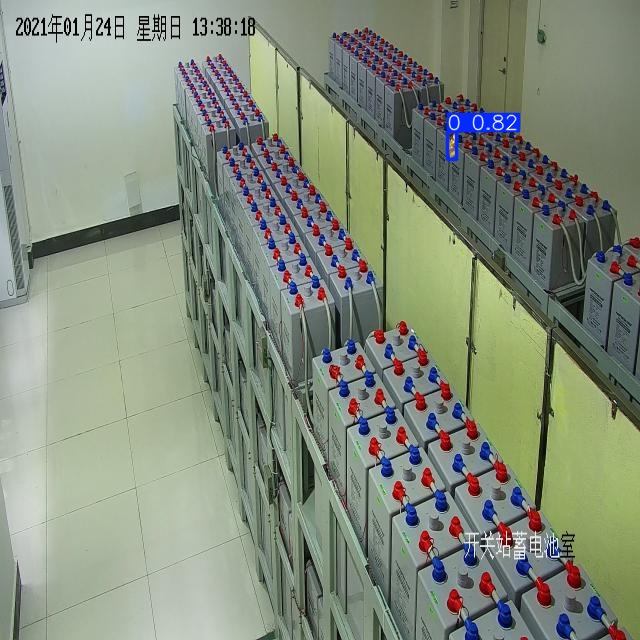

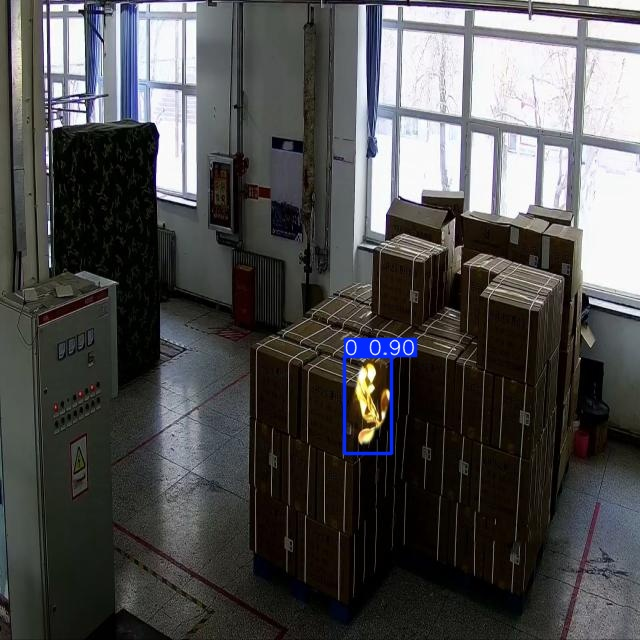

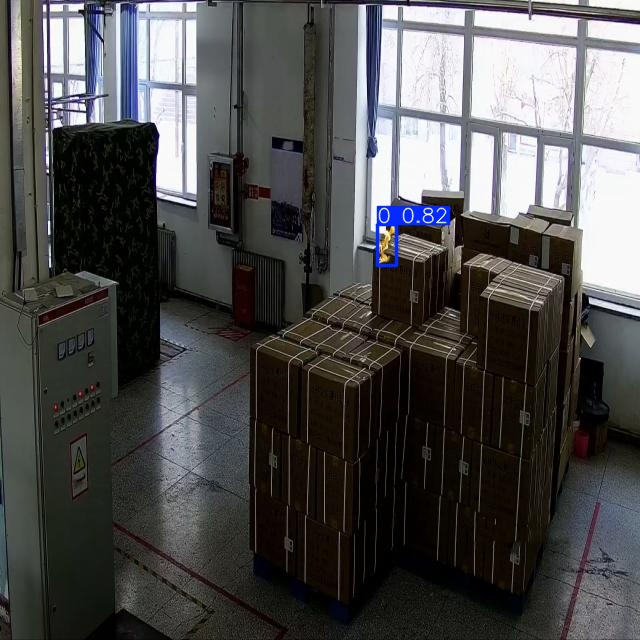

In [14]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

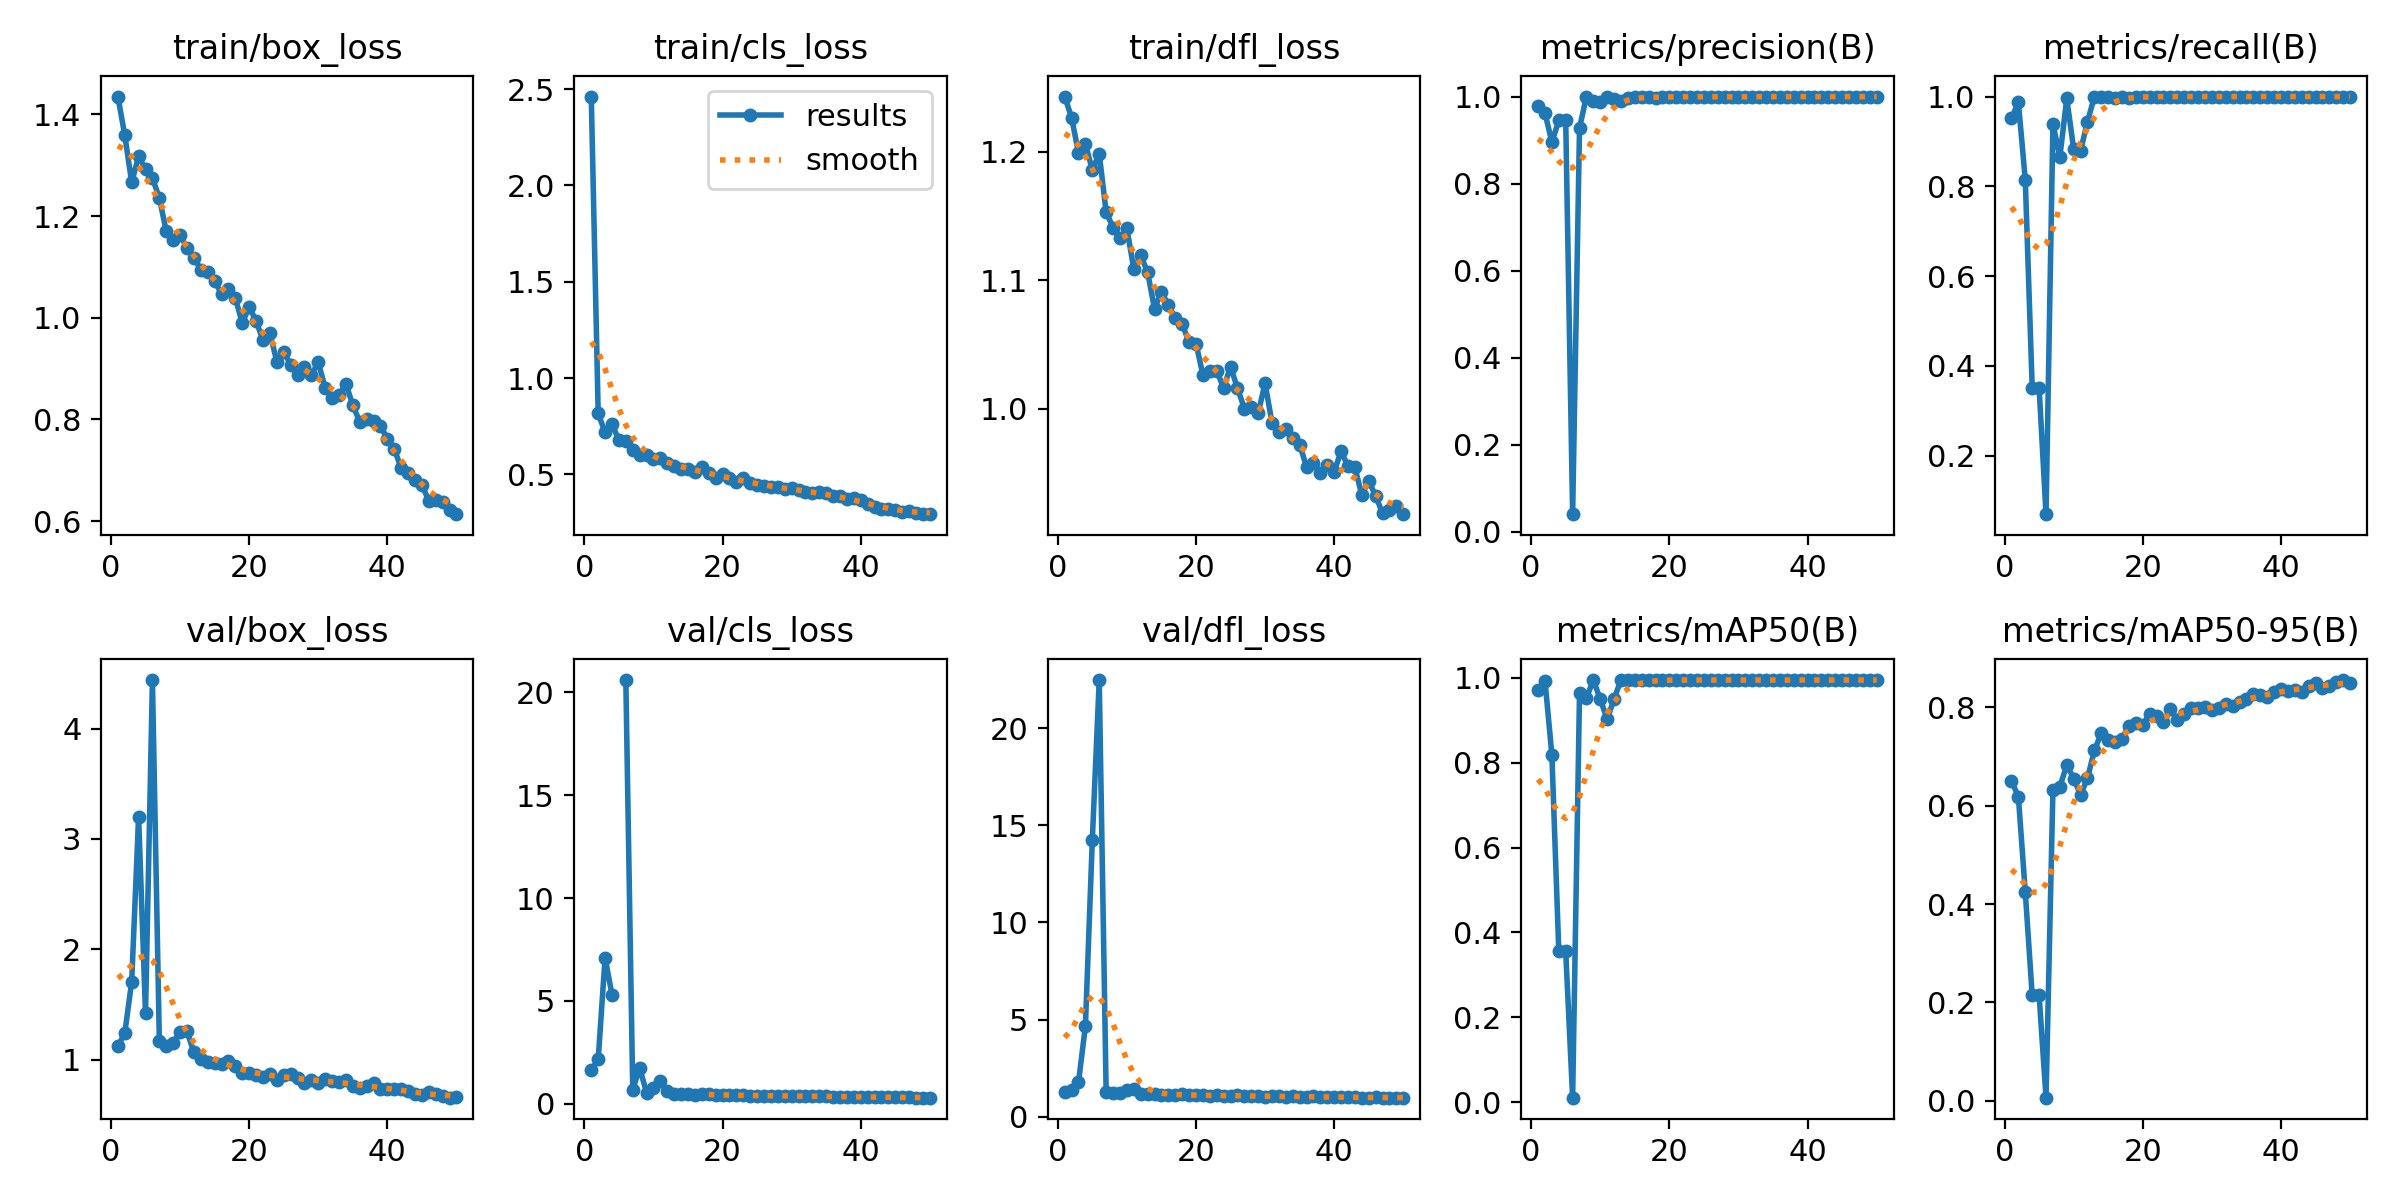

In [15]:
from IPython.display import Image as IPyImage

# Display training loss curves (accuracy, loss, and other metrics during training)
loss_curve_path = '/kaggle/working/runs/detect/train/results.png'
IPyImage(filename=loss_curve_path, width=600)


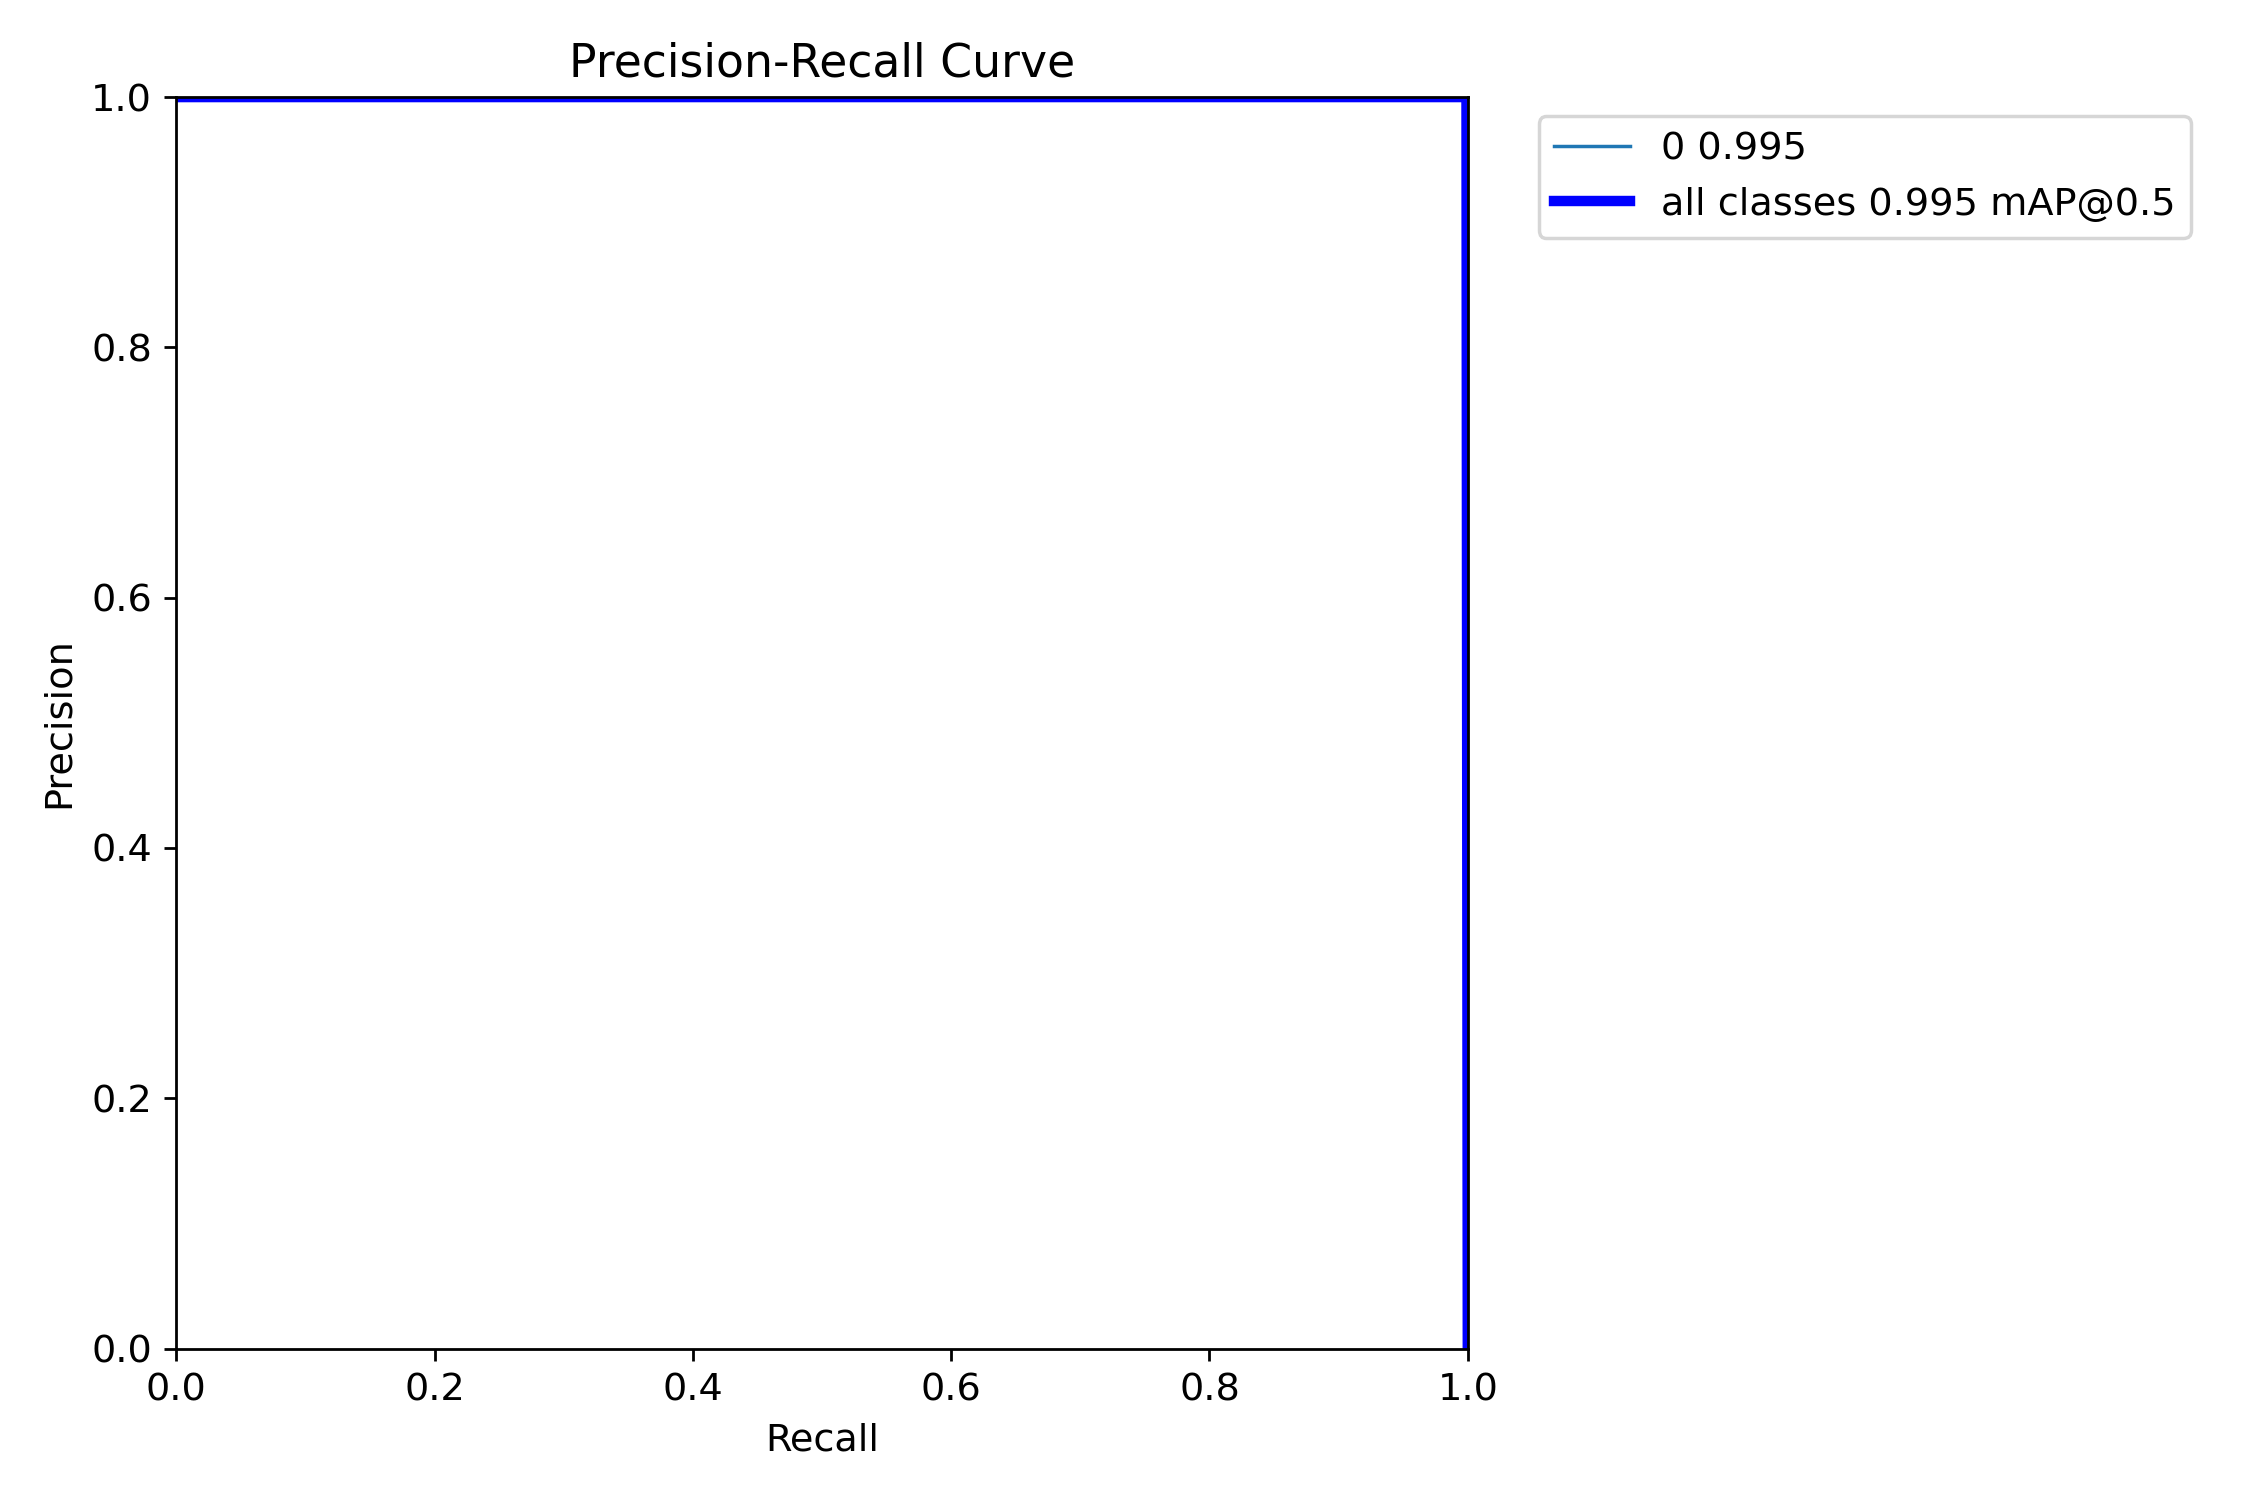

In [16]:
try:
    pr_curve_path = os.path.join("/kaggle/working/runs/detect/train/PR_curve.png")
    display(IPyImage(filename=pr_curve_path, width=800))
except FileNotFoundError:
    print(f"Precision-Recall curve image not found at: {pr_curve_path}")

In [17]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [18]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [19]:
!ls

Flames-and-Smoke-Detection-1  runs  yolo11n.pt	YOLO-V8-CAM  yolov9s.pt


In [20]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [21]:
!ls

 images        models	   yolo_cam
 LICENSE.txt   README.md  'YOLO v8n EigenCAM.ipynb'


In [22]:
!pip install ttach

In [23]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [24]:
img = cv2.imread('/kaggle/working/Flames-and-Smoke-Detection-1/test/images/huoyan4_30485876524_png.rf.f24f015f52959e4da1c160fa69984ca1.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [26]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolov9s.pt')
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): ELAN1(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=Tru


0: 640x640 1 suitcase, 474.5ms
Speed: 5.5ms preprocess, 474.5ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 640)


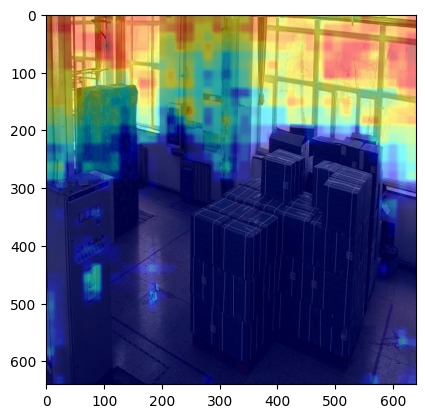

In [27]:
target_layers =[model.model.model[-10]]

cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 1 suitcase, 445.7ms
Speed: 3.2ms preprocess, 445.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


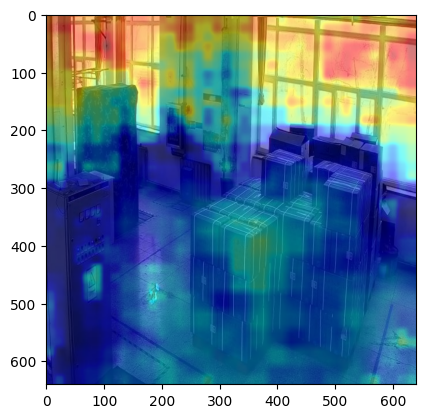

In [28]:
target_layers =[model.model.model[-10], model.model.model[-11], model.model.model[-12]]

cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

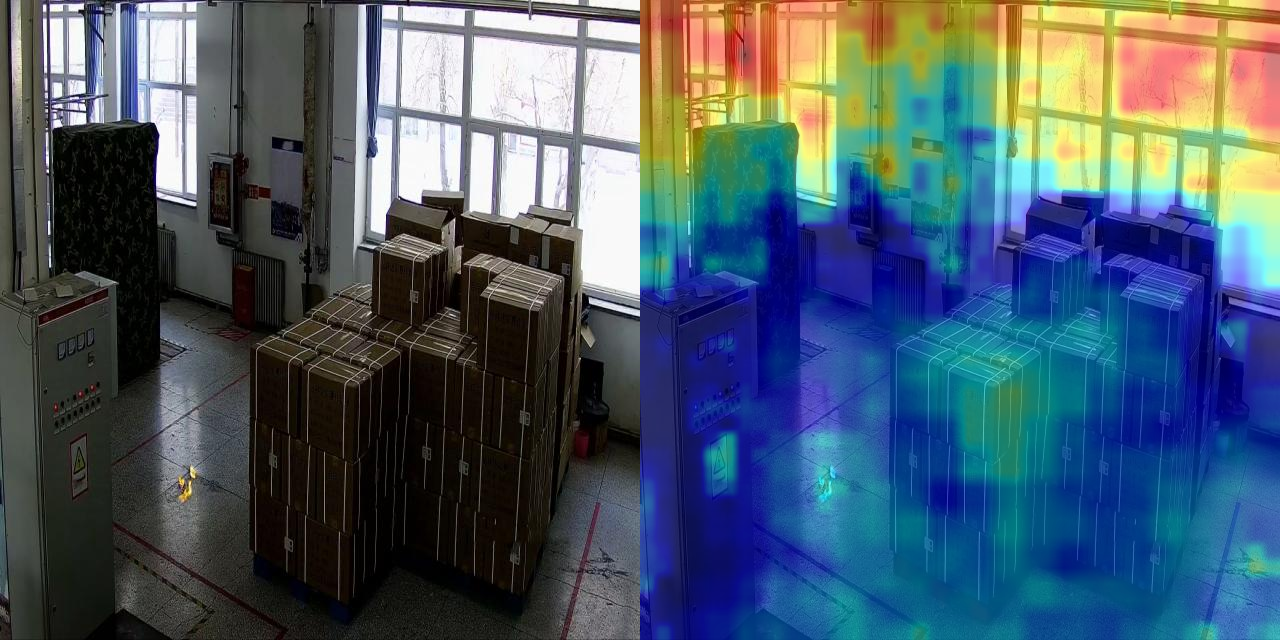

In [31]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))